# Quantum Computing Tasks

## Task 1: Simple Quantum Operation with 5 Qubits

a) Initialize a circuit with 5 qubits.
b) Apply a Hadamard operation on every qubit.
c) Apply CNOT operation on (0, 1), (1, 2), (2, 3), (3, 4).
d) SWAP qubits 0 and 4.
e) Rotate X by pi/2 on any qubit.
f) Plot the circuit.

## Task 2: Swap Test Circuit

-   Apply a Hadamard gate to the first qubit.
-   Rotate the second qubit by pi/3 around X.
-   Apply Hadamard gate to the third and fourth qubit.
-   Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>.

In [1]:

!pip install pennylane matplotlib

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 88.3 MB/s eta 0:00:00:00:0100:01


In [2]:


# Set up the quantum device with 5 qubits
five_qubit_system = qml.device("default.qubit", wires=5)

# Define the quantum node for the first circuit
@qml.qnode(five_qubit_system)
def create_first_quantum_circuit():
    # Apply Hadamard gates to all qubits
    for qubit_index in range(5):
        qml.Hadamard(wires=qubit_index)

    # Apply CNOT gates to adjacent qubit pairs
    adjacent_qubit_pairs = [(0, 1), (1, 2), (2, 3), (3, 4)]
    for control_qubit, target_qubit in adjacent_qubit_pairs:
        qml.CNOT(wires=[control_qubit, target_qubit])

    # Swap the first and last qubits
    qml.SWAP(wires=[0, 4])

    # Rotate a chosen qubit around the X-axis by pi/2
    rotation_amount = np.pi / 2
    selected_qubit = 2
    qml.RX(rotation_amount, wires=selected_qubit)

    # Return the final state of the quantum system
    return qml.state()

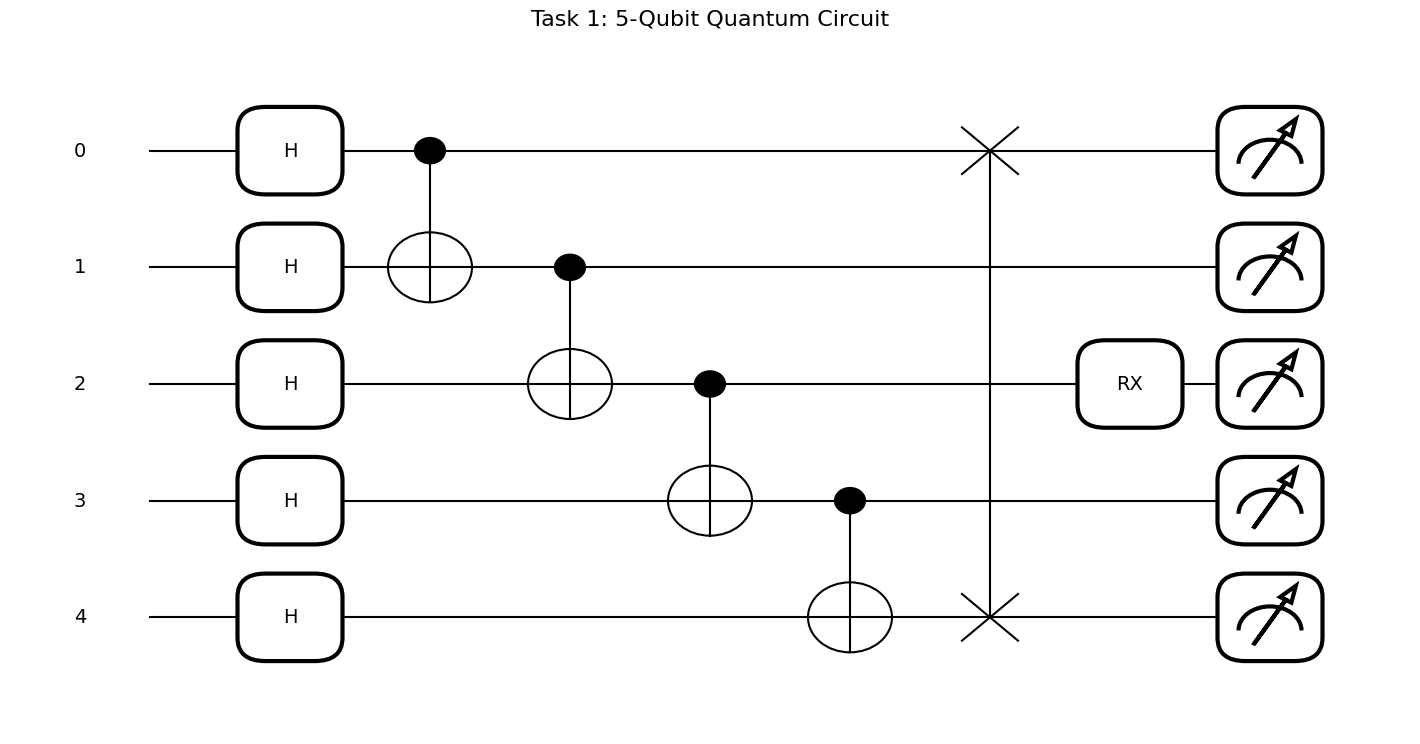


Task 1 Circuit (text visualization):
0: ──H─╭●──────────╭SWAP───────────┤  State
1: ──H─╰X─╭●───────│───────────────┤  State
2: ──H────╰X─╭●────│──────RX(1.57)─┤  State
3: ──H───────╰X─╭●─│───────────────┤  State
4: ──H──────────╰X─╰SWAP───────────┤  State


In [3]:


# Execute the first quantum circuit
final_state_of_first_circuit = create_first_quantum_circuit()

# Visualize the first circuit using a matplotlib plot
figure1, axis1 = qml.draw_mpl(create_first_quantum_circuit)()
axis1.set_title("Task 1: 5-Qubit Quantum Circuit", fontsize=16)
figure1.set_size_inches(14, 7)
figure1.savefig('task1_quantum_circuit.png')
plt.show()

# Print a text-based visualization of the first circuit
print("\nTask 1 Circuit (text visualization):")
print(qml.draw(create_first_quantum_circuit)())

In [4]:


# Set up the quantum device for the swap test
swap_test_system = qml.device("default.qubit", wires=5)

# Define the quantum node for the swap test circuit
@qml.qnode(swap_test_system)
def create_swap_test_circuit():
    # Use the last qubit as an auxiliary qubit
    auxiliary_qubit = 4

    # Apply Hadamard gate to the auxiliary qubit
    qml.Hadamard(wires=auxiliary_qubit)

    # Apply Hadamard gate to the first qubit
    qml.Hadamard(wires=0)

    # Rotate the second qubit around the X-axis by pi/3
    rotation_angle_x = np.pi / 3
    qml.RX(rotation_angle_x, wires=1)

    # Apply Hadamard gates to the third and fourth qubits
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)

    # Perform controlled-SWAP operations (CSWAP or Fredkin gates)
    qml.CSWAP(wires=[auxiliary_qubit, 0, 2])
    qml.CSWAP(wires=[auxiliary_qubit, 1, 3])

    # Apply Hadamard gate to the auxiliary qubit again
    qml.Hadamard(wires=auxiliary_qubit)

    # Return the probabilities of the auxiliary qubit's states
    return qml.probs(wires=auxiliary_qubit)

Probability of |0⟩: 0.7500
Probability of |1⟩: 0.2500
Estimated overlap: 0.5000


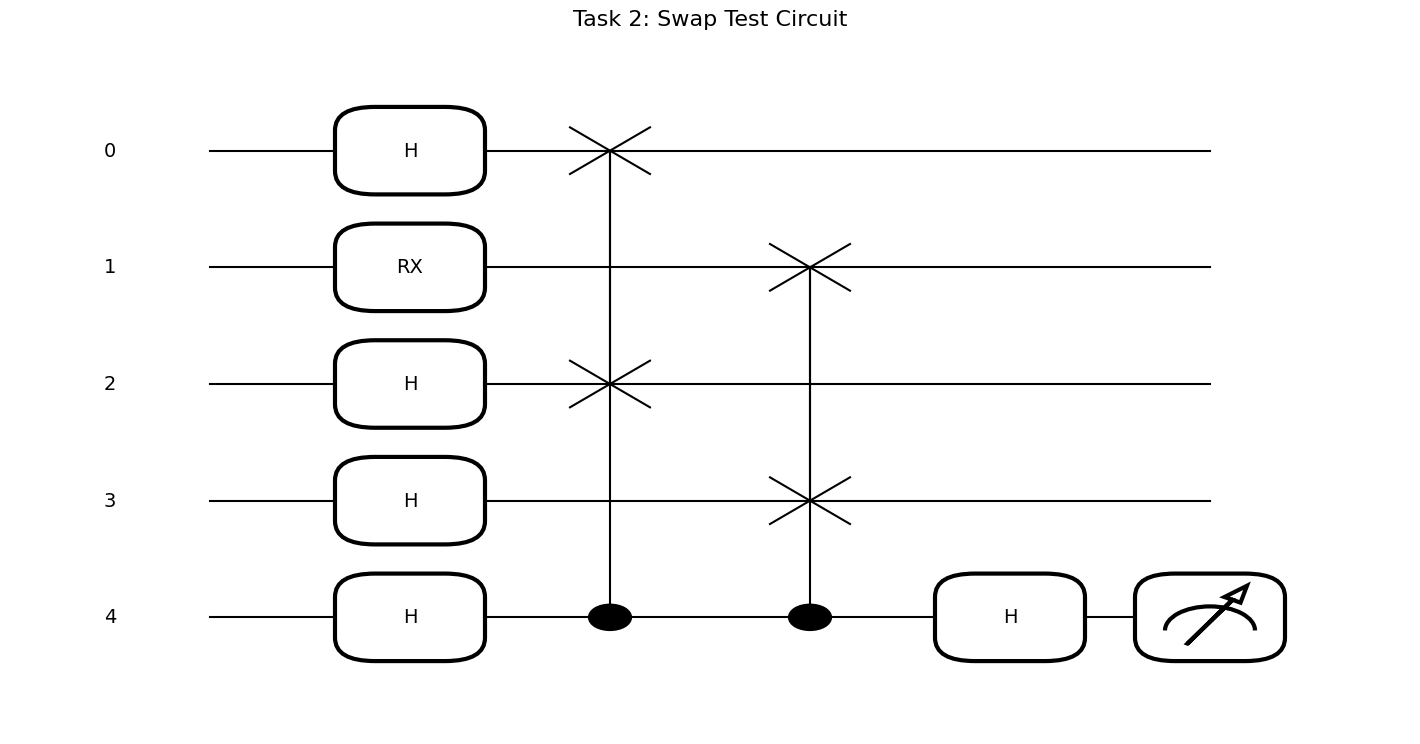


Task 2 Circuit (text visualization):
0: ──H────────╭SWAP──────────┤       
1: ──RX(1.05)─│─────╭SWAP────┤       
2: ──H────────├SWAP─│────────┤       
3: ──H────────│─────├SWAP────┤       
4: ──H────────╰●────╰●─────H─┤  Probs


In [5]:

# Execute the swap test circuit
swap_test_results = create_swap_test_circuit()
probability_of_zero = swap_test_results[0]
probability_of_one = swap_test_results[1]

# Calculate the estimated overlap between the states
estimated_state_overlap = 2 * probability_of_zero - 1

# Print the results
print(f"Probability of |0⟩: {probability_of_zero:.4f}")
print(f"Probability of |1⟩: {probability_of_one:.4f}")
print(f"Estimated overlap: {estimated_state_overlap:.4f}")

# Visualize the swap test circuit using a matplotlib plot
figure2, axis2 = qml.draw_mpl(create_swap_test_circuit)()
axis2.set_title("Task 2: Swap Test Circuit", fontsize=16)
figure2.set_size_inches(14, 7)
figure2.savefig('task2_swap_test_circuit.png')
plt.show()

# Print a text-based visualization of the swap test circuit
print("\nTask 2 Circuit (text visualization):")
print(qml.draw(create_swap_test_circuit)())